### Importação dos dados



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
# faturamento total para cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# dataframe
faturamento_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

print("Faturamento por Loja:")
print(faturamento_df)

Faturamento por Loja:
     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


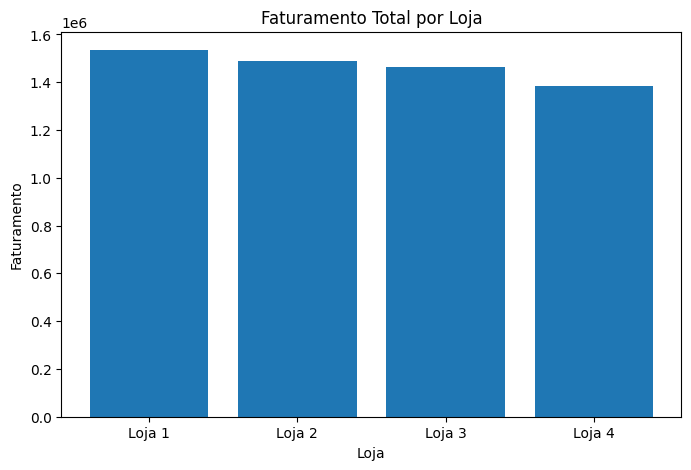

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(faturamento_df['Loja'], faturamento_df['Faturamento'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.show()

# 2. Vendas por Categoria


In [7]:
# vendas por categoria para cada loja
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto').size().reset_index(name='Vendas_Loja1')
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto').size().reset_index(name='Vendas_Loja2')
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto').size().reset_index(name='Vendas_Loja3')
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto').size().reset_index(name='Vendas_Loja4')

# dataframe
vendas_por_categoria = pd.merge(vendas_por_categoria_loja1, vendas_por_categoria_loja2, on='Categoria do Produto', how='outer')
vendas_por_categoria = pd.merge(vendas_por_categoria, vendas_por_categoria_loja3, on='Categoria do Produto', how='outer')
vendas_por_categoria = pd.merge(vendas_por_categoria, vendas_por_categoria_loja4, on='Categoria do Produto', how='outer').fillna(0)

print("Vendas por Categoria em Cada Loja:")
print(vendas_por_categoria)

Vendas por Categoria em Cada Loja:
    Categoria do Produto  Vendas_Loja1  Vendas_Loja2  Vendas_Loja3  \
0             brinquedos           324           313           315   
1       eletrodomesticos           312           305           278   
2            eletronicos           448           422           451   
3        esporte e lazer           284           275           277   
4  instrumentos musicais           182           224           177   
5                 livros           173           197           185   
6                 moveis           465           442           499   
7  utilidades domesticas           171           181           177   

   Vendas_Loja4  
0           338  
1           254  
2           451  
3           277  
4           170  
5           187  
6           480  
7           201  


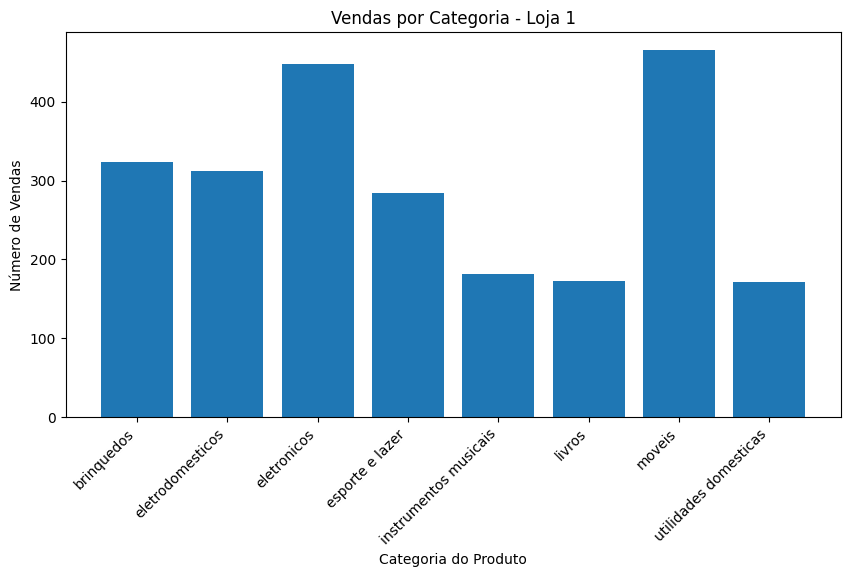

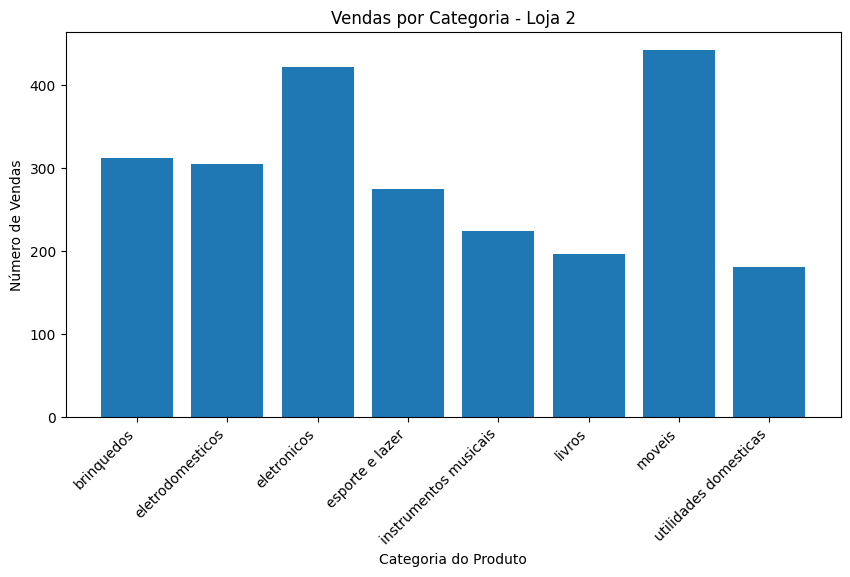

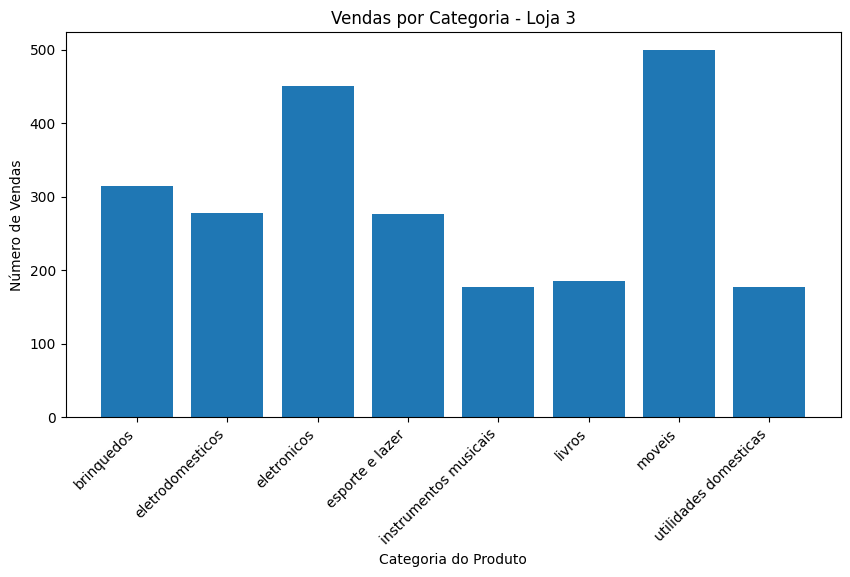

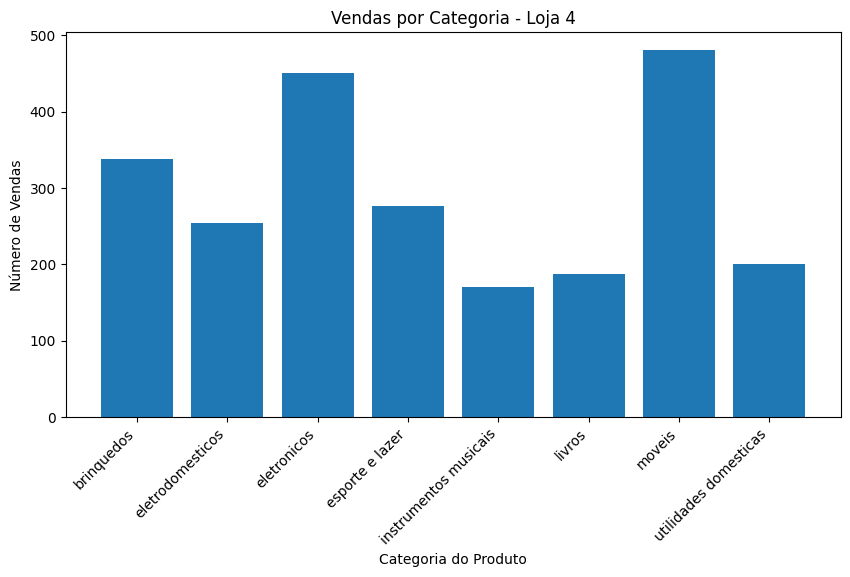

In [8]:
# categorias mais populares em cada loja

# Loja 1
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Vendas_Loja1'])
plt.title('Vendas por Categoria - Loja 1')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x
plt.show()

# Loja 2
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Vendas_Loja2'])
plt.title('Vendas por Categoria - Loja 2')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

# Loja 3
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Vendas_Loja3'])
plt.title('Vendas por Categoria - Loja 3')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

# Loja 4
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Vendas_Loja4'])
plt.title('Vendas por Categoria - Loja 4')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()


Total de Vendas por Categoria (Todas as Lojas):
    Categoria do Produto  Vendas_Loja1  Vendas_Loja2  Vendas_Loja3  \
6                 moveis           465           442           499   
2            eletronicos           448           422           451   
0             brinquedos           324           313           315   
1       eletrodomesticos           312           305           278   
3        esporte e lazer           284           275           277   
4  instrumentos musicais           182           224           177   
5                 livros           173           197           185   
7  utilidades domesticas           171           181           177   

   Vendas_Loja4  Total_Vendas  
6           480          1886  
2           451          1772  
0           338          1290  
1           254          1149  
3           277          1113  
4           170           753  
5           187           742  
7           201           730  


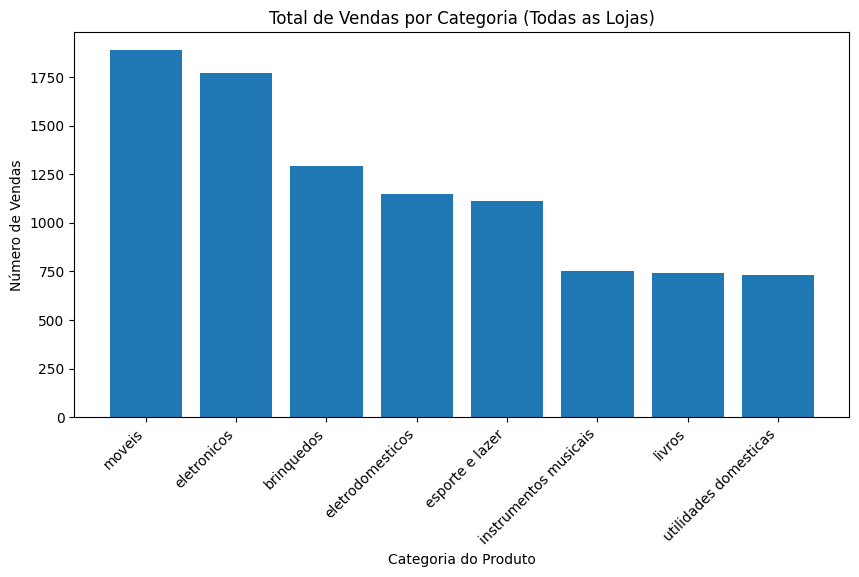

In [9]:
# total de vendas por categoria em todas as lojas
vendas_por_categoria['Total_Vendas'] = vendas_por_categoria['Vendas_Loja1'] + vendas_por_categoria['Vendas_Loja2'] + vendas_por_categoria['Vendas_Loja3'] + vendas_por_categoria['Vendas_Loja4']

# total de vendas
vendas_por_categoria_ordenado = vendas_por_categoria.sort_values(by='Total_Vendas', ascending=False)

print("\nTotal de Vendas por Categoria (Todas as Lojas):")
print(vendas_por_categoria_ordenado)

# total de vendas por categoria
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria_ordenado['Categoria do Produto'], vendas_por_categoria_ordenado['Total_Vendas'])
plt.title('Total de Vendas por Categoria (Todas as Lojas)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Média de Avaliação das Lojas

In [10]:
# mêdia das avaliações da loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# dataframe
media_avaliacoes_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média da Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
})

print("Média das Avaliações por Loja:")
print(media_avaliacoes_df)

Média das Avaliações por Loja:
     Loja  Média da Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759


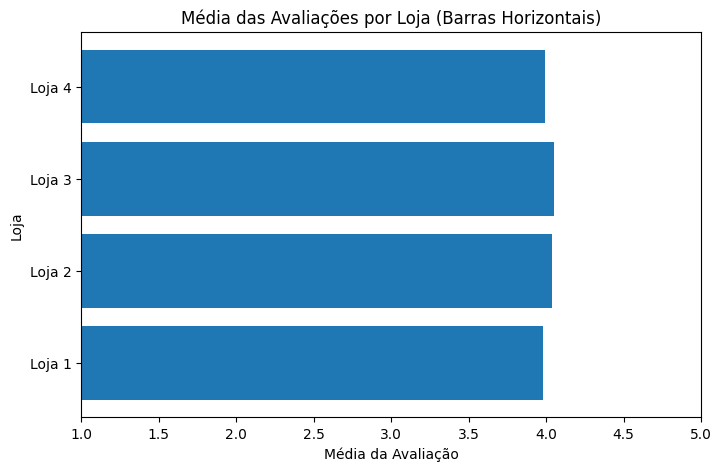

In [12]:
plt.figure(figsize=(8, 5))
plt.barh(media_avaliacoes_df['Loja'], media_avaliacoes_df['Média da Avaliação'])
plt.title('Média das Avaliações por Loja (Barras Horizontais)')
plt.xlabel('Média da Avaliação')
plt.ylabel('Loja')
plt.xlim(1, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [16]:
# vendas por produto em cada loja
vendas_por_produto_loja1 = loja.groupby('Produto').size().reset_index(name='Vendas_Loja1')
vendas_por_produto_loja2 = loja2.groupby('Produto').size().reset_index(name='Vendas_Loja2')
vendas_por_produto_loja3 = loja3.groupby('Produto').size().reset_index(name='Vendas_Loja3')
vendas_por_produto_loja4 = loja4.groupby('Produto').size().reset_index(name='Vendas_Loja4')

# DataFrames
vendas_por_produto = pd.merge(vendas_por_produto_loja1, vendas_por_produto_loja2, on='Produto', how='outer')
vendas_por_produto = pd.merge(vendas_por_produto, vendas_por_produto_loja3, on='Produto', how='outer')
vendas_por_produto = pd.merge(vendas_por_produto, vendas_por_produto_loja4, on='Produto', how='outer').fillna(0)

In [17]:
# mais e menos vendidos
def top_e_bottom_produtos_simples(df, loja_coluna, n=5):
    """
    Identifica os n produtos mais e menos vendidos em uma loja (versão simples).

    Args:
        df (pd.DataFrame): DataFrame com as vendas por produto.
        loja_coluna (str): Nome da coluna com os dados de vendas da loja.
        n (int): Número de produtos a retornar (top e bottom).

    Returns:
        pd.DataFrame: DataFrame com os produtos mais e menos vendidos.
    """
    top_produtos = df.sort_values(by=loja_coluna, ascending=False)[:n]
    bottom_produtos = df.sort_values(by=loja_coluna, ascending=True)[:n]
    return pd.concat([top_produtos, bottom_produtos])

top_bottom_loja1 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja1']], 'Vendas_Loja1')
top_bottom_loja2 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja2']], 'Vendas_Loja2')
top_bottom_loja3 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja3']], 'Vendas_Loja3')
top_bottom_loja4 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja4']], 'Vendas_Loja4')

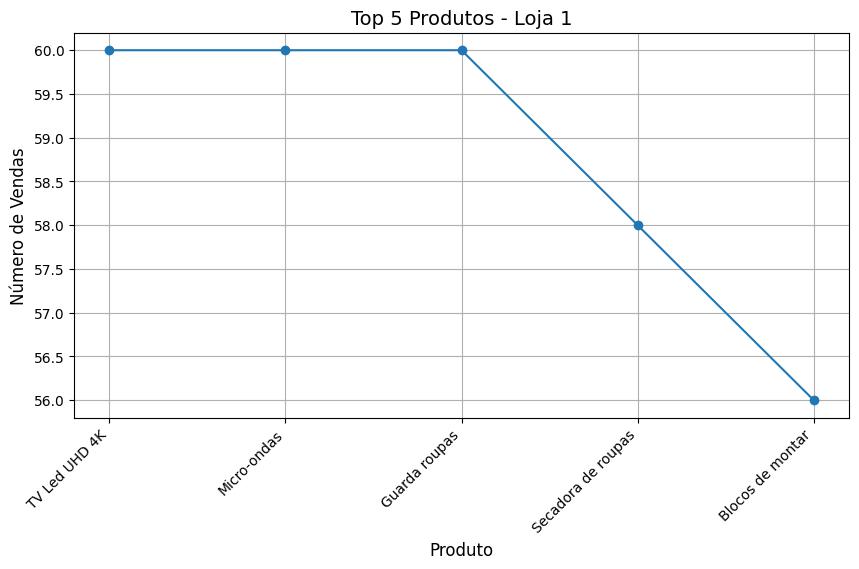

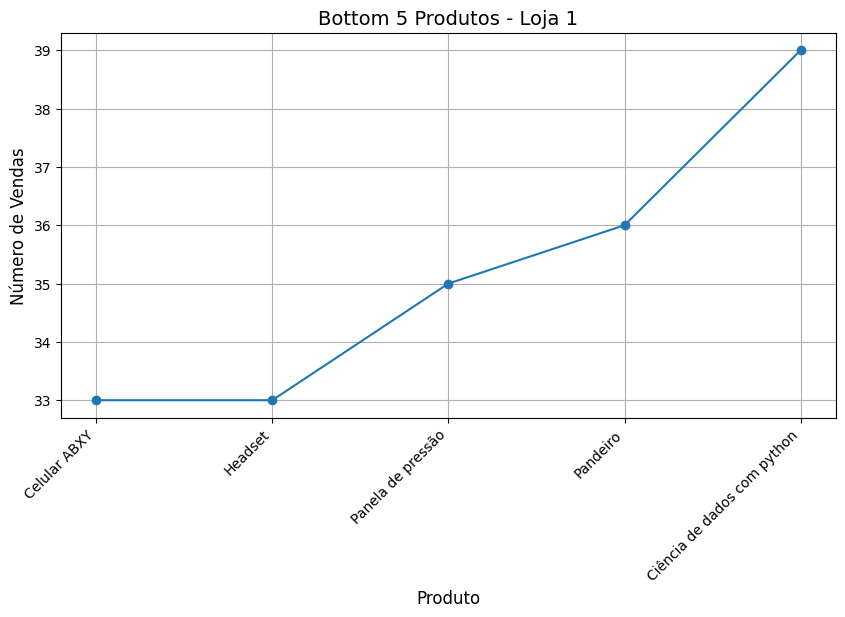

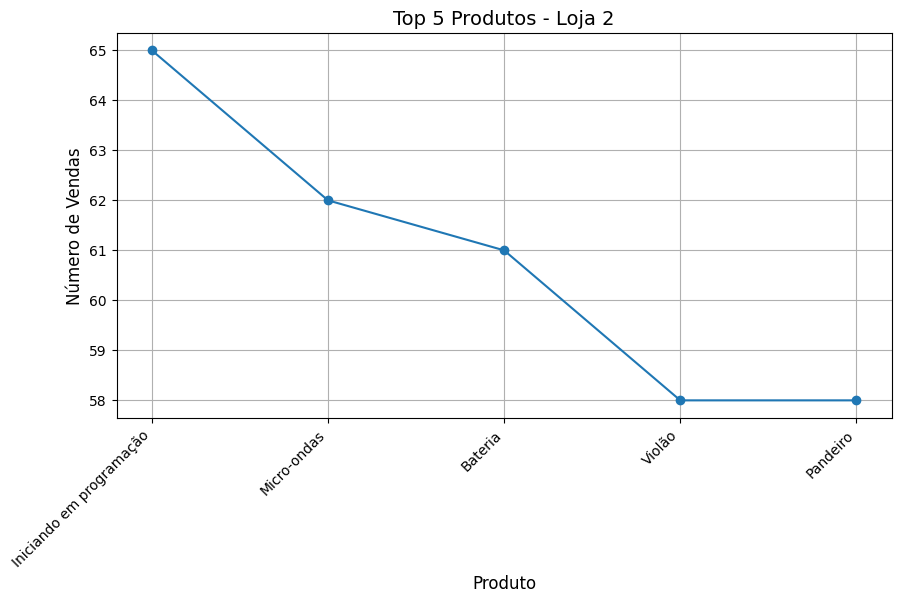

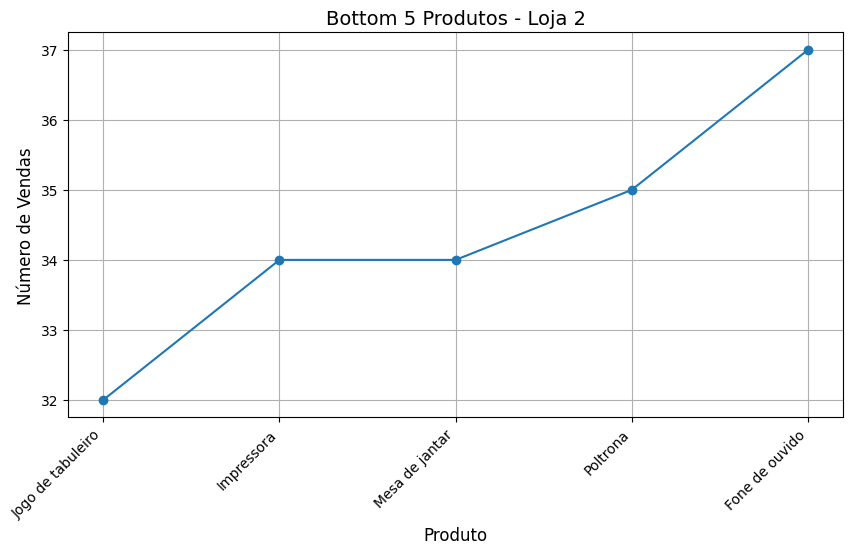

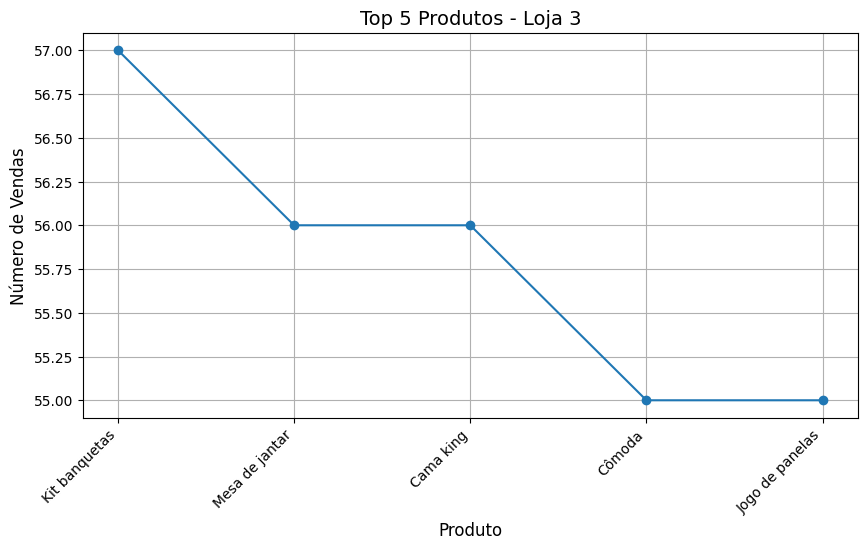

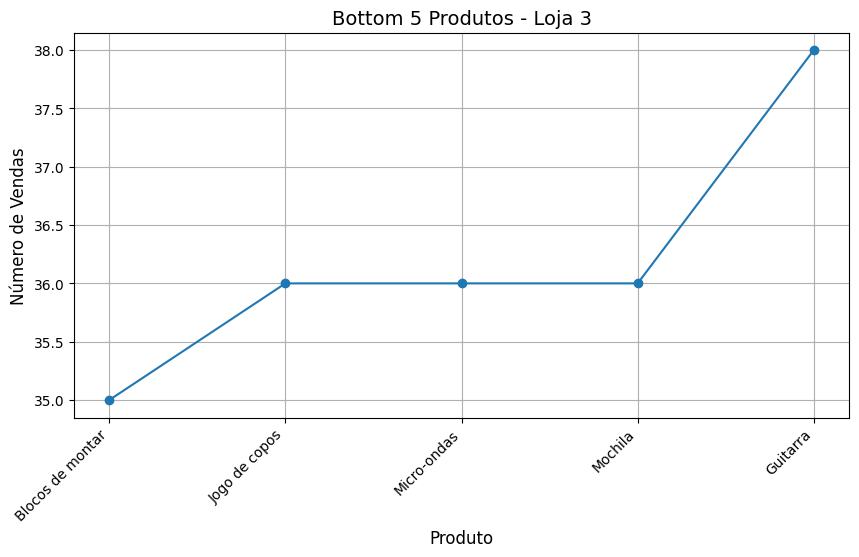

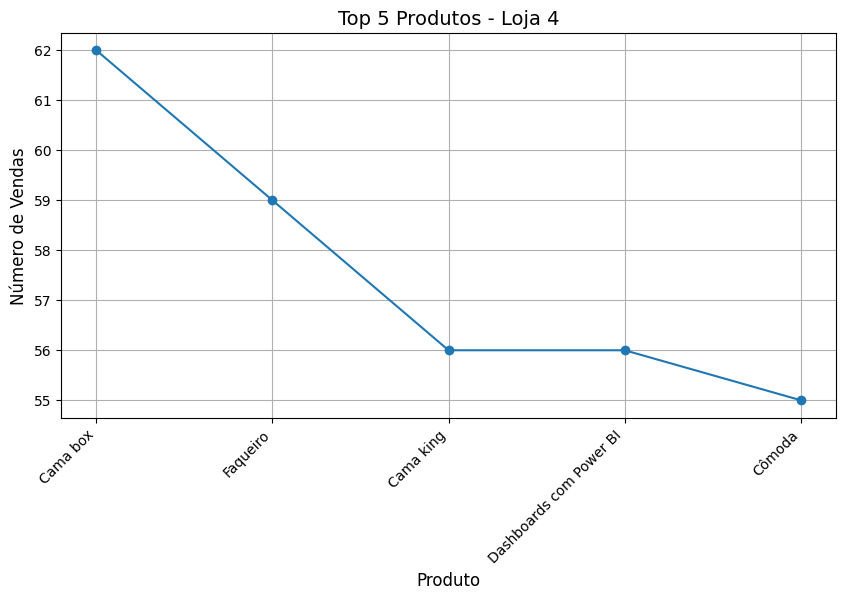

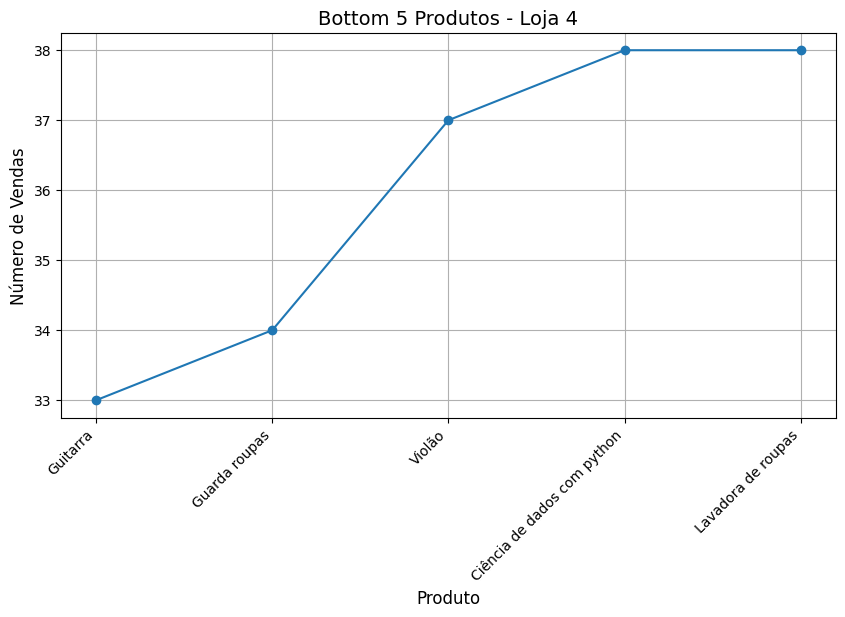

In [20]:
def plot_top_bottom_produtos_linha(df, loja_nome, top=True):
    """
    Plota os top ou bottom 5 produtos mais vendidos de uma loja usando um gráfico de linha.

    Args:
        df (pd.DataFrame): DataFrame com os produtos mais vendidos.
        loja_nome (str): Nome da loja para o título do gráfico.
        top (bool, optional): Se True, plota os top 5. Se False, plota os bottom 5. Padrão é True.
    """
    plt.figure(figsize=(10, 5))
    if top:
        data_slice = df[:5]
        title_prefix = "Top"
    else:
        data_slice = df[-5:]
        title_prefix = "Bottom"

    plt.plot(data_slice['Produto'], data_slice[data_slice.columns[1]], marker='o', linestyle='-')
    plt.title(f'{title_prefix} 5 Produtos - {loja_nome}', fontsize=14)
    plt.ylabel('Número de Vendas', fontsize=12)
    plt.xlabel('Produto', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(True)
    plt.show()

plot_top_bottom_produtos_linha(top_bottom_loja1, 'Loja 1', top=True)  # Top 5 Loja 1
plot_top_bottom_produtos_linha(top_bottom_loja1, 'Loja 1', top=False) # Bottom 5 Loja 1

plot_top_bottom_produtos_linha(top_bottom_loja2, 'Loja 2', top=True)  # Top 5 Loja 2
plot_top_bottom_produtos_linha(top_bottom_loja2, 'Loja 2', top=False) # Bottom 5 Loja 2

plot_top_bottom_produtos_linha(top_bottom_loja3, 'Loja 3', top=True)  # Top 5 Loja 3
plot_top_bottom_produtos_linha(top_bottom_loja3, 'Loja 3', top=False) # Bottom 5 Loja 3

plot_top_bottom_produtos_linha(top_bottom_loja4, 'Loja 4', top=True)  # Top 5 Loja 4
plot_top_bottom_produtos_linha(top_bottom_loja4, 'Loja 4', top=False) # Bottom 5 Loja 4



# 5. Frete Médio por Loja


In [21]:
# custo médio de frete para cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# armazenando os resultados
frete_medio_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete_Medio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

print("Custo Médio de Frete por Loja:")
print(frete_medio_df)

Custo Médio de Frete por Loja:
     Loja  Frete_Medio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


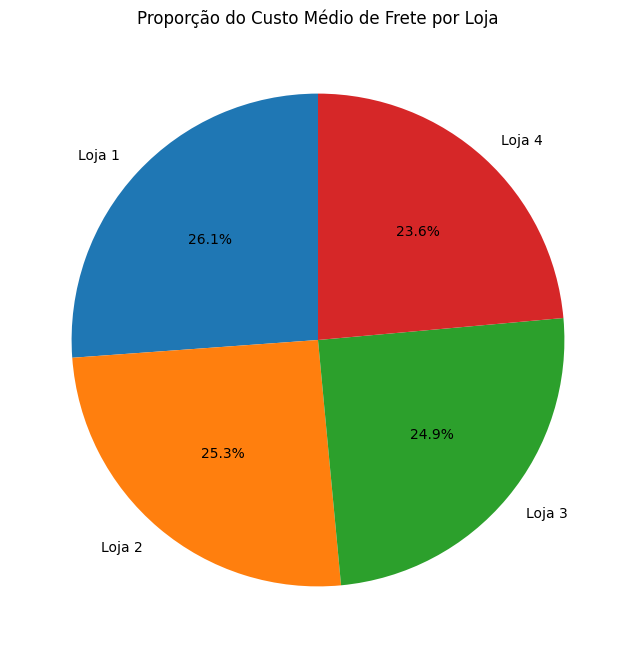

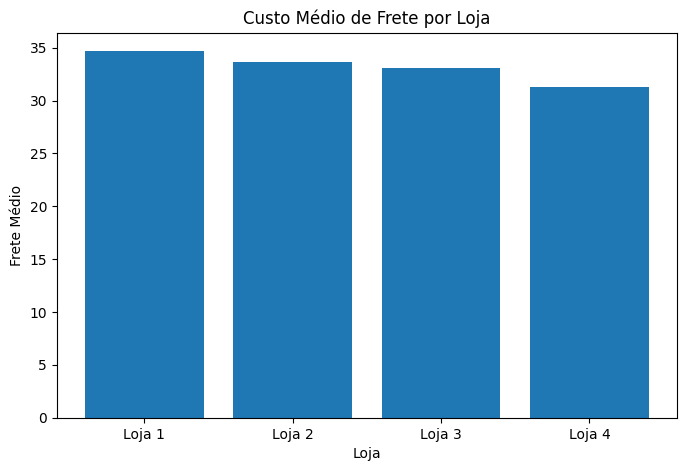

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(frete_medio_df['Frete_Medio'], labels=frete_medio_df['Loja'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção do Custo Médio de Frete por Loja')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(frete_medio_df['Loja'], frete_medio_df['Frete_Medio'])
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.show()